## **Customer Churn Prediction**

**Goal**: The goal of this project is to predict customer churn for a telecommunications company using machine learning techniques.

In [ ]:
#needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data

df = pd.read_csv(r"C:\Users\Admin\Documents\Christabel_Projects\customer-churn\data\Telco_Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Descrition**

- **customerID**; A unique identifier for each customer. 
- **gender**; Gender of the customer (Male / Female).  
- **SeniorCitizen**; Indicates if the customer is a senior citizen (1 = Yes, 0 = No).
- **Partner**; Whether the customer has a partner (Yes / No).
- **Dependents**; Whether the customer has dependents such as children (Yes / No).
- **tenure**; Number of months the customer has stayed with the company.
- **PhoneService**; Whether the customer has phone service (Yes / No).
- **MultipleLines**; Indicates if the customer has multiple phone lines (Yes / No / No phone service).
- **InternetService**; Type of internet service (DSL / Fiber optic / No).
- **OnlineSecurity**; Whether the customer has online security add-on (Yes / No / No internet service).
- **DeviceProtection**; Indicates if the customer has device protection (Yes / No / No internet service).
- **TechSupport**; Whether the customer has tech support (Yes / No / No internet service).
- **StreamingTV**; Whether the customer streams TV (Yes / No / No internet service).
- **StreamingMovies**; Whether the customer streams movies (Yes / No / No internet service).
- **Contract**; Type of contract (Month-to-month / One year / Two year).
- **PaperlessBilling**; Whether the customer receives paperless bills (Yes / No).
- **PaymentMethod**; Method of payment (Electronic check, Mailed check, Bank transfer, Credit card).
- **MonthlyCharges**; The amount charged to the customer monthly.
- **TotalCharges**; The total amount charged to the customer over their tenure. 
- **Churn**; Target variable indicating if the customer left within the last month (Yes / No).


In [3]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# convert the 'totalcharges' to numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
# statistical information about the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
#check for nulls
print(df.isna().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
#fill in missing values for the 'totalcharges' column
df.fillna(df['TotalCharges'].mean())

**EDA**

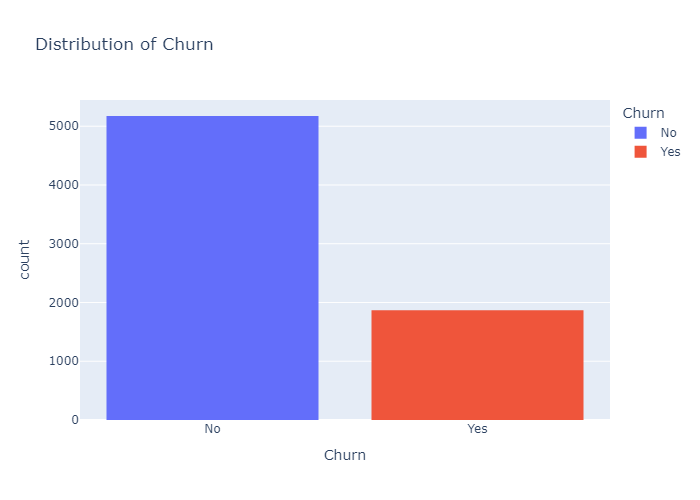

In [ ]:
# distribution of churn

fig = px.histogram(df, x='Churn', color='Churn', title='Distribution of Churn')
fig.show()
fig.write_image("churn_distribution.png")
Image("churn_distribution.png")

Observations

- From the histogram, the churners (1869) were less as compared to the non-churners (5174). Also, there is class imbalance since the majority are the non-churners.

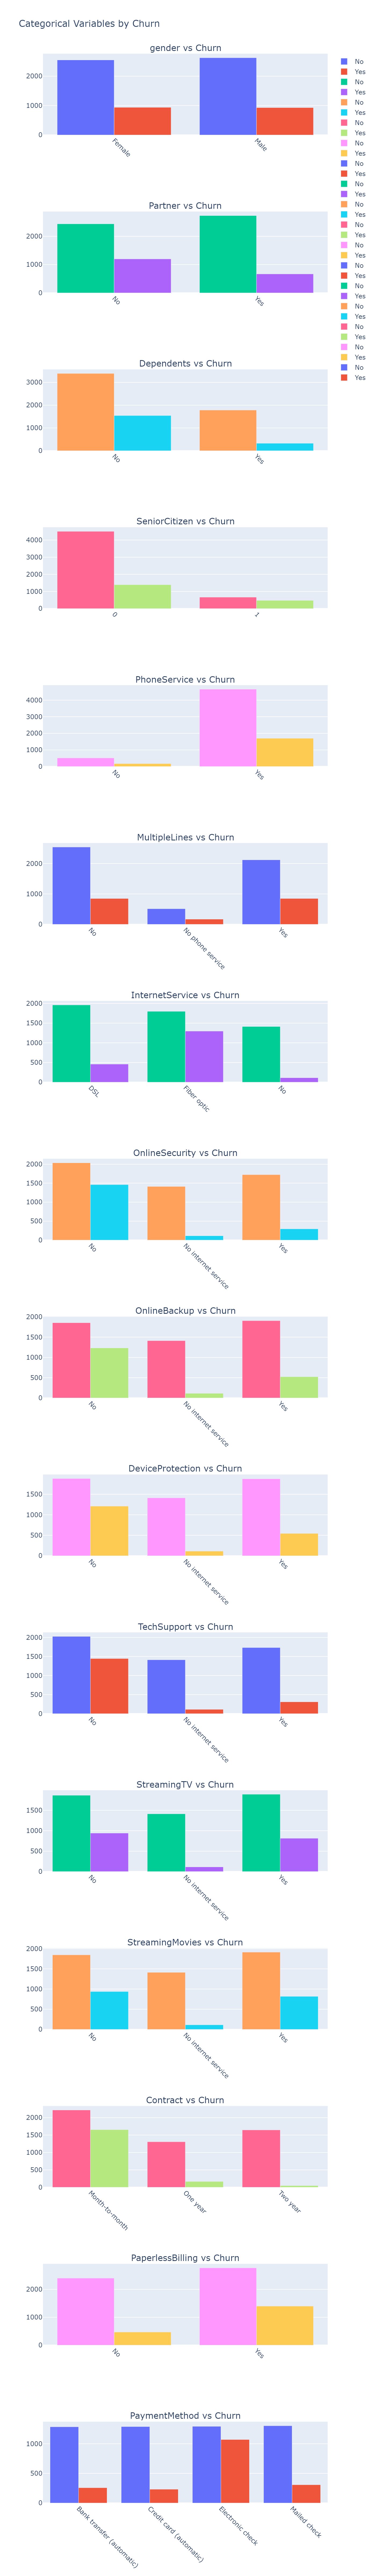

In [34]:
#distriution of categorical variables verses churn
categorical_cols = ['gender','Partner', 'Dependents','SeniorCitizen',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

target = 'Churn'

fig = make_subplots(rows = len(categorical_cols), cols=1, 
                    subplot_titles=[f"{c} vs {target}" for c in categorical_cols])

for i, col in enumerate(categorical_cols, start=1):
    counts = df.groupby([col, target]).size().unstack(fill_value=0)
    for churn_value in counts.columns:
        fig.add_trace(
            go.Bar(x=counts.index.astype(str), y=counts[churn_value], name=str(churn_value)),
                    row=i, col=1
        )

fig.update_layout(height=300*len(categorical_cols), barmode='group', title_text = 'Categorical Variables by Churn',showlegend=True)
fig.update_xaxes(tickangle=45)
fig.show()
fig.write_image("categorical_vs_churn.png", scale=2)
Image("categorical_vs_churn.png")


**Insights**

`Gender vs Churn`
- Most of the males and the females did not churn, but comparing the churners between the males and the females the number of females was high as compared to males.

`Partner vs Churn`
- Most of the customers with partners are the ones who churned.

`Dependents vs Churn`
- Most of the customers who churned are the one who had no dependents.

`Senior citizen vs Churn`
- Most of the customers who were not senior citizens were the most churners.

`Phone Service vs Churn`
- Most of the customers with phone services are the most churners.

`Multiple Lines vs Churn`
- Most of the customers with multiple lines are at the risk of churning.

`Internet service vs Churn`
- Most of the customers who used fiber optic internet service were at the risk of churning.

`Online security vs Churn`
- Most of the customers who had no online security were at the risk of churning.

`Online Backup vs Churn`
- The customers who had no online backup were at a risk of churning.

`Device Protection vs Churn`
- Customers with no device protection services were at a risk of churning.

`Tech support vs Churn`
- Customers who did not receive tech support services were at the risk of churning.

`Streamingtv vs Churn`
- Customers who had no streaming tv services were at risk of churning.

`Contract vs Churn`
- Customers who had signed for month to month contract were at the risk of churning.

`Payment method vs Churn`
- Customers who used the electronic check payment method were the most churners followed by the once who used mailed check payment method.








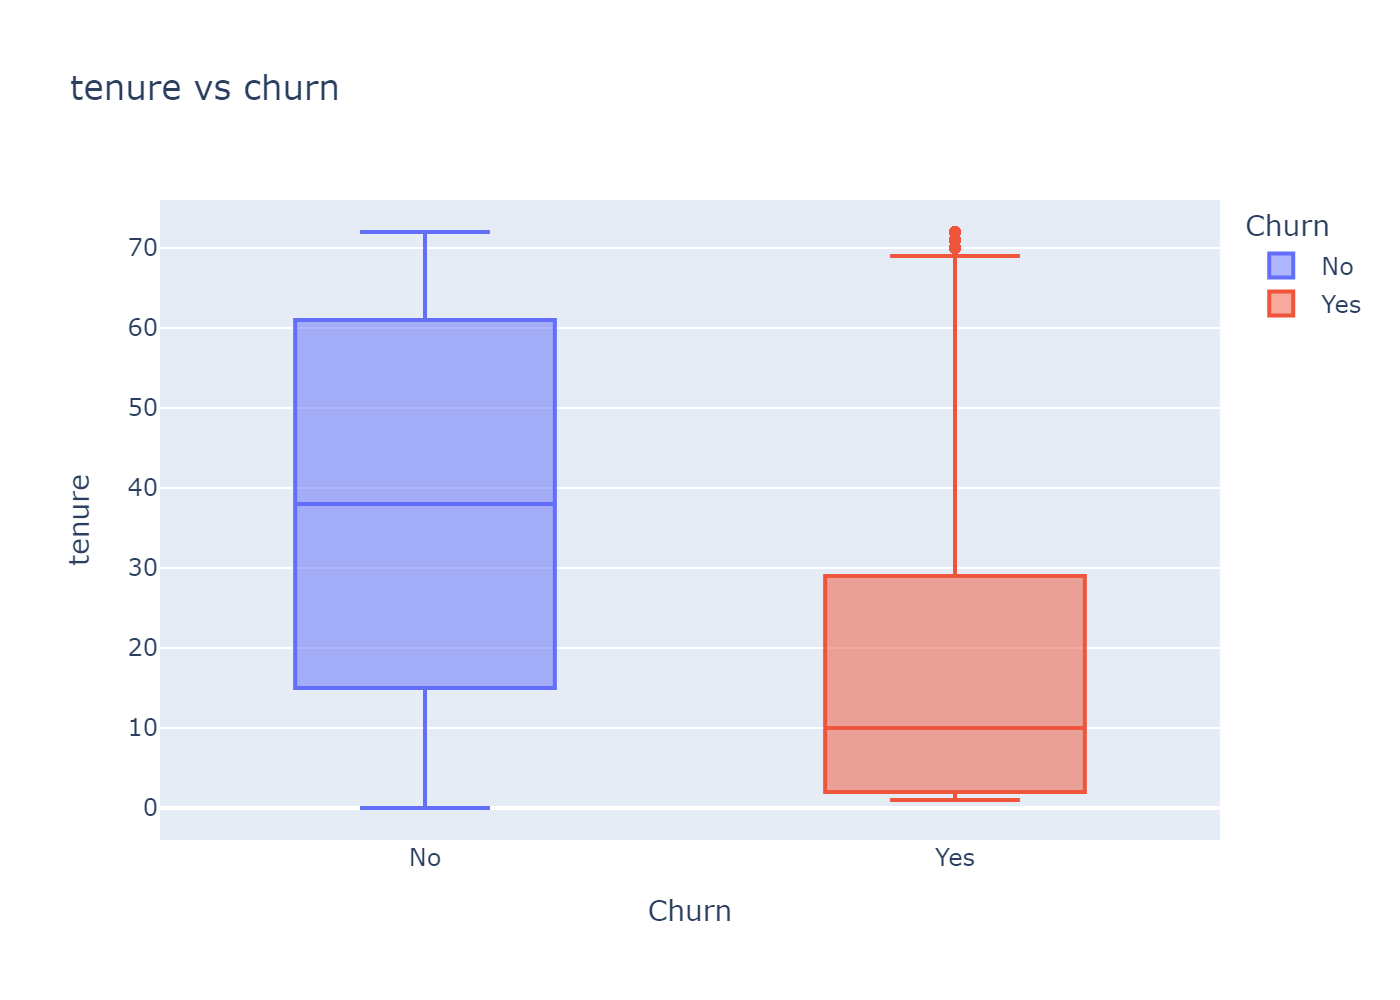

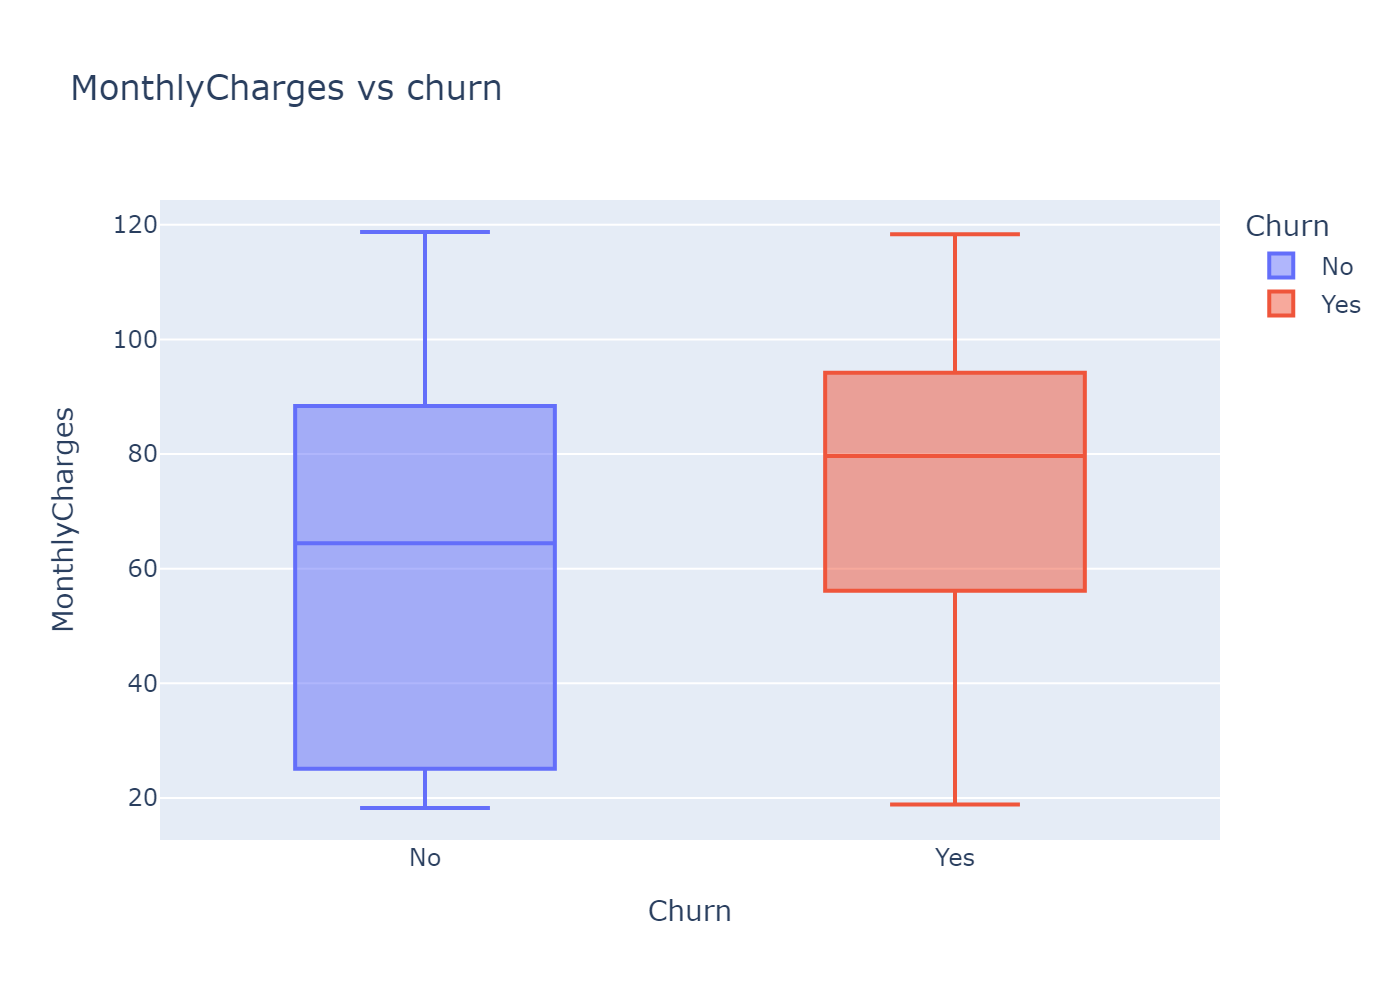

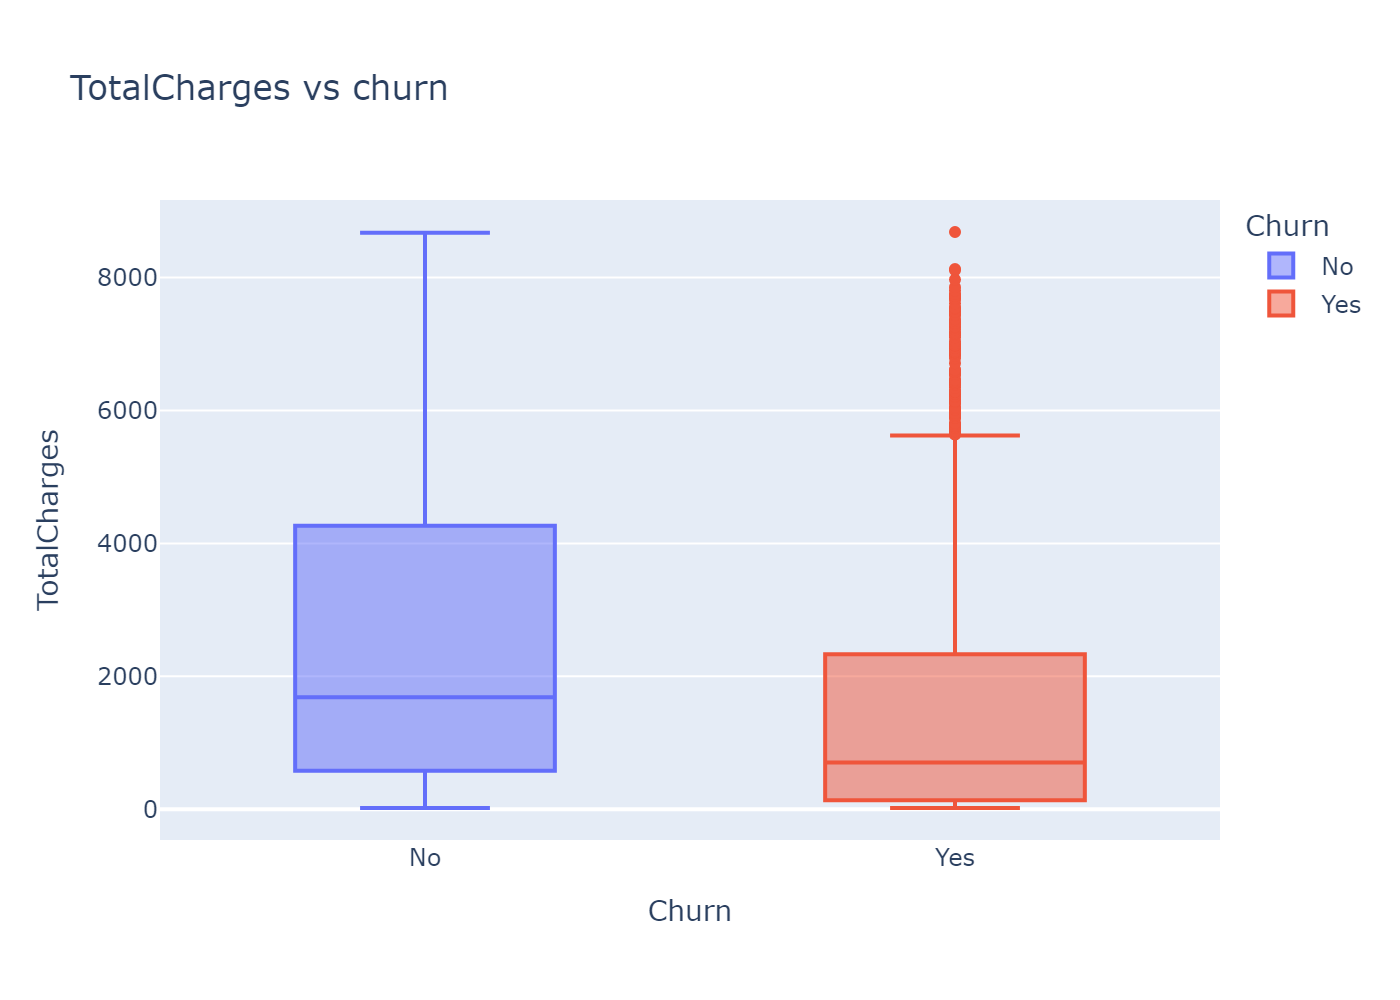

In [35]:
# Distribution of numerical variables verses churn
numerica_cols = ['tenure','MonthlyCharges', 'TotalCharges']

for col in numerica_cols:
    fig = px.box(df, x='Churn', y=col, color='Churn', title=f"{col} vs churn")
    fig.write_image(f"{col}_vs_churn.png", scale=2) 
    fig.show()
    display(Image(filename=f"{col}_vs_churn.png"))



**Insights**

`Tenure vs Churn`
- Customers who churn (leave the company) have a significantly shorter tenure compared to customers who do not churn. This strongly suggests that new or short-term customers are the most at-risk segment for churn.

`Monthly charges vs Churn`
- Customers with higher Monthly Charges are significantly more likely to churn. The median monthly charge for customers who churn is approximately $80, which is substantially higher than the median charge of approximately $64 for customers who do not churn. This suggests that cost is a major driver of churn risk.

`Total charges vs Churn`
- Customers who churn have paid significantly lower Total Charges compared to customers who do not churn. This result is consistent with the earlier finding that churning customers have shorter tenures, resulting in lower cumulative spending, but also highlights that long-term, high-spending customers are far more loyal.

**Feature Engineering**

In [10]:
# drop the customer id
df=df.drop('customerID', axis=1)

In [11]:
categorical_cols = ['gender', 'Partner', 'Dependents','SeniorCitizen',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [12]:
#get dummies from the categorical varaibles
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,SeniorCitizen_1,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,No,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,No,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,Yes,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,True,True,True,False,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,72,103.20,7362.90,No,False,True,True,False,True,False,...,False,True,False,True,True,False,True,True,False,False
7040,11,29.60,346.45,No,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
7041,4,74.40,306.60,Yes,True,True,False,True,True,False,...,False,False,False,False,False,False,True,False,False,True


In [13]:
# encode the traget variable
df_encoded['Churn'] = df_encoded['Churn'].map({'No':0, 'Yes':1})

In [14]:
#feature correlation
corr_matrix = df_encoded.corr()

#get the features that are related to churn
corr = corr_matrix['Churn'].sort_values(ascending=True)

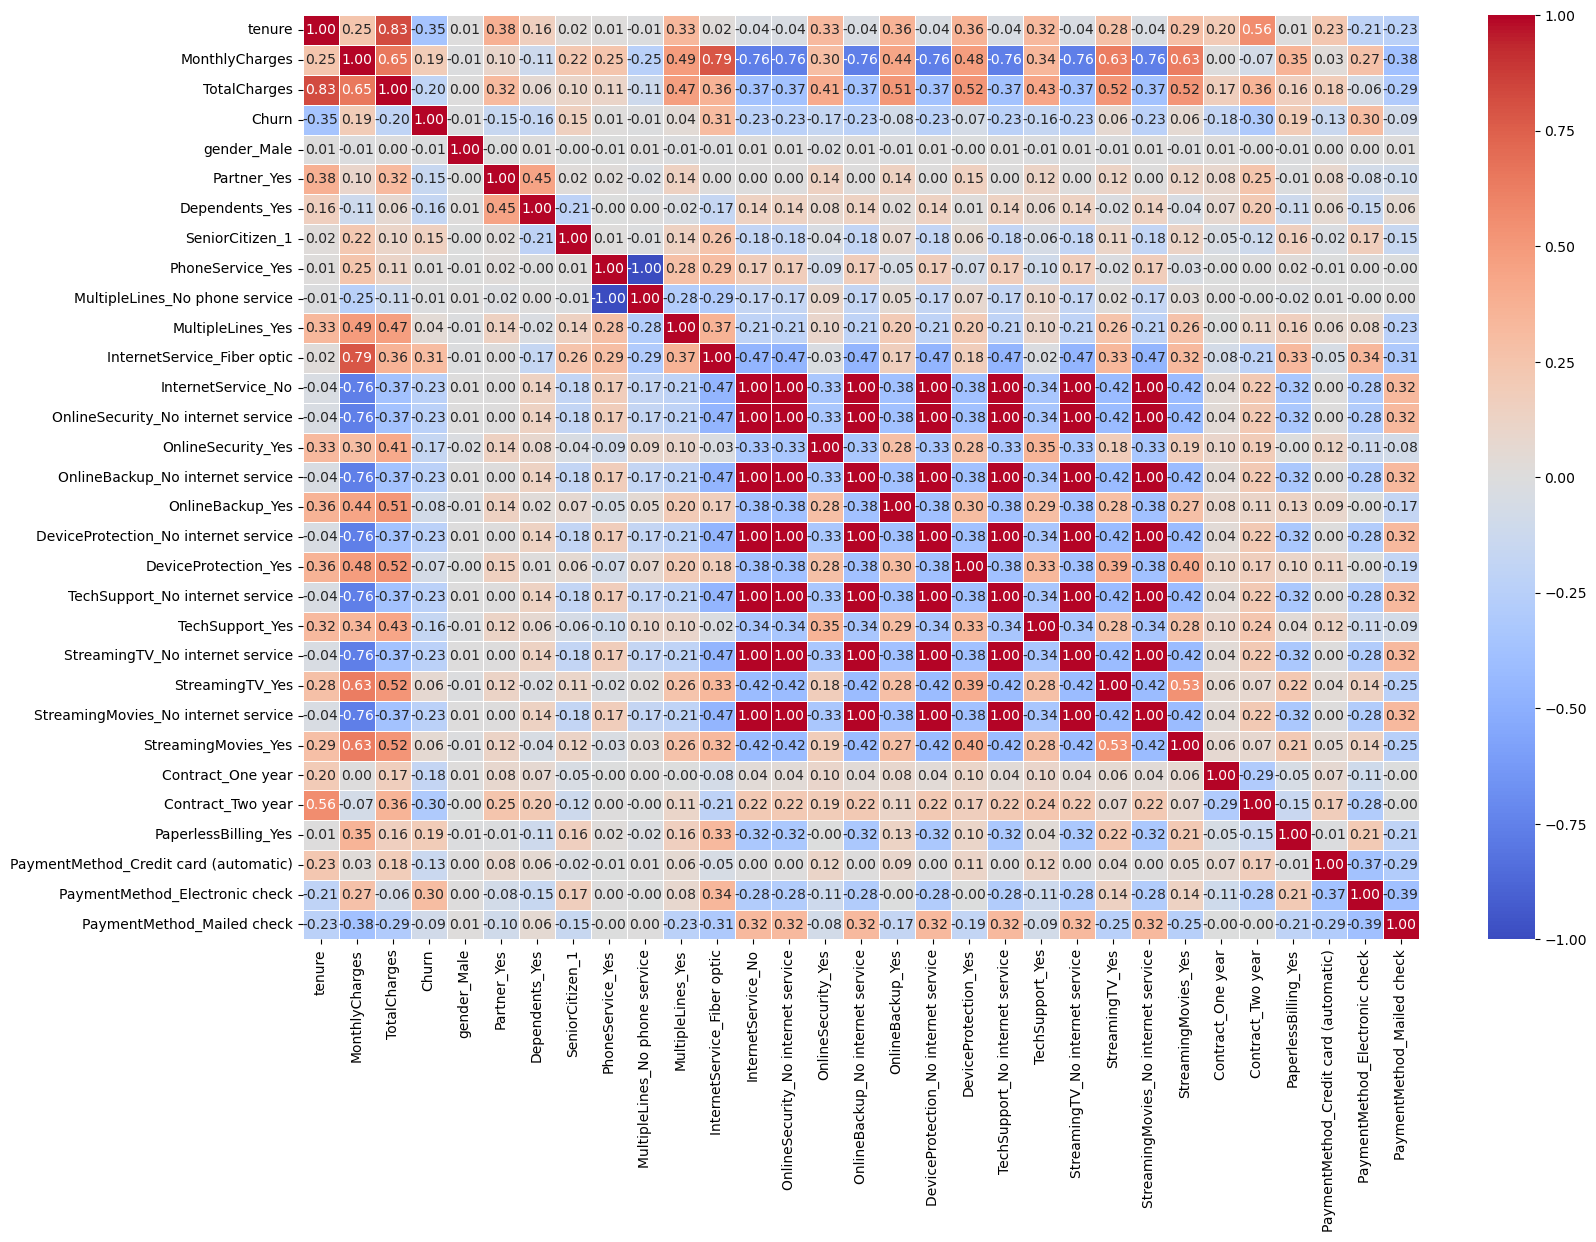

In [15]:
#heatmap to show the feature correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.show()

**Negative correlated variables to churn**
- Longer tenure: customers who’ve been with the company longer are more loyal.
- Higher total charges: these customers likely represent long-term users.
- Subscribed to value-added services such as Online Security, Tech Support, or Device Protection: these increase product stickiness.
- Have dependents or partners: possibly more stable households with consistent usage.

**Positive correlated variables to churn**
- Fiber-optic internet: this group might face higher prices or unmet expectations.
- Pay via electronic check: could indicate older systems or less satisfied customers.
- Having higher monthly charges: pricing pressure appears to influence churn.
- Opt for paperless billing: may reflect a younger, more mobile segment prone to switching.
- Being senior citizens: possibly cost-sensitive.

**Insight**

The analysis shows that customers on shorter contracts, with high monthly charges and fiber optic internet, are significantly more likely to churn while customers with long tenure and added services (like Tech Support or Online Security) show higher retention.

In [16]:
"""
Drop the features with no correlation to churn and also features with multicollinearity 
"""
col_to_drop = ['gender_Male','PhoneService_Yes','TotalCharges','OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service','InternetService_Fiber optic','MultipleLines_Yes','StreamingMovies_Yes','StreamingTV_Yes'  ]

df_encoded = df_encoded.drop(columns=col_to_drop)

**Modelling**

In [17]:
#split data into X and y
X = df_encoded.drop('Churn', axis=1)
y=df_encoded['Churn']

In [18]:
X_train, X_test,  y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Logistic Regression

In [19]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred))
print("The classification report: \n",classification_report(y_test, y_pred))


The accuracy is: 
 0.7416607523066004
The confusion matrix is: 
 [[752 283]
 [ 81 293]]
The classification report: 
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409



In [20]:
lr = LogisticRegression(max_iter=1000,
                            solver='liblinear',
                            class_weight='balanced',
                            C=1.0,
                            penalty='l2',
                            random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred))
print("The classification report: \n",classification_report(y_test, y_pred))

The accuracy is: 
 0.7402413058907026
The confusion matrix is: 
 [[750 285]
 [ 81 293]]
The classification report: 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



**Insights**
- The model achieved an accuracy of 74% with the precision of 51% and recall of 78% for the churned customers.
- In this context, recall matters the most because missing actual churners is more costly than mistakenly flagging loyal customers. When a real churner is not detected, the company loses them permanently, whereas contacting a non-churner incurs minimal cost.
- Although precision (0.51) indicates that some non-churners are wrongly predicted as churners therefore it’s better to reach out to a few extra customers than to miss those who are truly at risk.

- The top features driving churn are the `customers without phone service`, `customers using the electronic payment method`, `paperless billing customers`, `Older customers` and also the  `customers using the mailed payment method`.

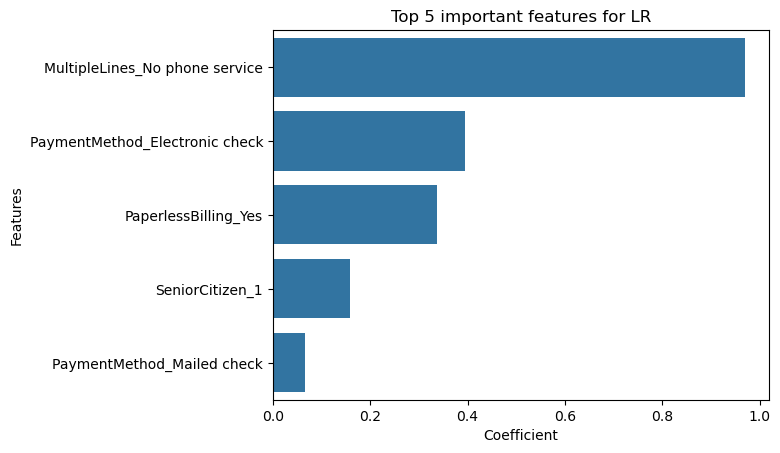

In [21]:
#feature importance for logistic regression
coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({
    'Features': X.columns,
    'Coefficient':coefficients
}).sort_values(by='Coefficient', ascending=False)

top_features = feature_importance.head(5)

#PLOT
sns.barplot(x=top_features['Coefficient'], y=top_features['Features'], orient='h')
plt.title('Top 5 important features for LR')
plt.show()

Random Forest

In [22]:
# fit in the random forest model with the class weight as balanced due to imbalanceness
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred_rf))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred_rf))
print("The classification report: \n",classification_report(y_test, y_pred_rf))

The accuracy is: 
 0.7821149751596878
The confusion matrix is: 
 [[927 108]
 [199 175]]
The classification report: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [23]:
#hyperparameter tuning
param_grid = {'n_estimators':[100, 200,300],
                'max_depth':[5,10,15,None],
                'min_samples_leaf':[1,2,4],
                'min_samples_split':[2,5,10],
                'bootstrap':[True, False],
                'class_weight':['balanced']}

rf = RandomForestClassifier(random_state=42)

r_cv = RandomizedSearchCV(rf, param_distributions=param_grid, 
                          n_iter=15, scoring='f1', cv=3, verbose=2, random_state=42)

r_cv.fit(X_train, y_train)

y_pred_rf = r_cv.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred_rf))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred_rf))
print("The classification report: \n",classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, min_samples_lea

**Insights**
- The model achieved an accuracy of 75% with the precision of 52% and recall of 74% for the churned customers.
- The Recall (0.74) is more important than precision, because missing actual churners is costly than losing a customer.
- Even though precision (0.52) isn’t perfect, the model would still be very useful, where it’s better to reach out to a few extra customers than miss those at risk of churning.

- Top contributing features driving churn predictions include tenure, monthly charges, contract type (one-year and two-year), payment method (electronic check), and whether the customer has internet service.

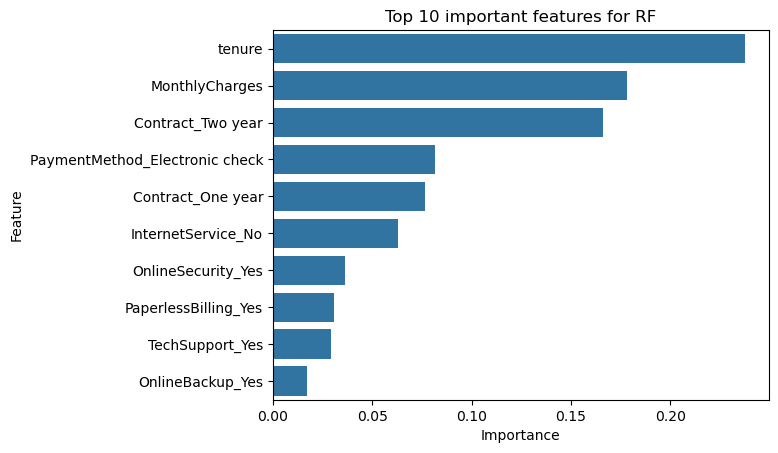

In [24]:
#---feature importance for RF
best_rf = r_cv.best_estimator_
importance  = best_rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(10)

sns.barplot(x=top_features['Importance'],y=top_features['Feature'],orient='h')
plt.title('Top 10 important features for RF')
plt.show()

**XGBOOST**

In [25]:
#use the xgboost model and scale pos weight to address class imbalanceness
xg = XGBClassifier(scale_pos_weight = len(y_train[y_train==0])/ len(y_train[y_train==1]),
                   random_state=42)
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred_xg))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred_xg))
print("The classification report: \n",classification_report(y_test, y_pred_xg))




The accuracy is: 
 0.7551454932576295
The confusion matrix is: 
 [[813 222]
 [123 251]]
The classification report: 
               precision    recall  f1-score   support

           0       0.87      0.79      0.82      1035
           1       0.53      0.67      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409



In [26]:
#hyperparameter tune
xg = XGBClassifier(objective='binary:logistic',
                   eval_metrics='logloss',
                   use_label_encoder=False,
                   random_state=42)
scale_pos_weight=(y==0).sum() / (y==1).sum()
param_grid ={
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.05, 0.1],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0],
    'scale_pos_weight':[scale_pos_weight]
}
random_search = RandomizedSearchCV(xg, 
                                   param_distributions=param_grid,
                                   scoring='f1',
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

y_pred_xg = random_search.predict(X_test)

print("The accuracy is: \n", accuracy_score(y_test, y_pred_xg))
print("The confusion matrix is: \n",confusion_matrix(y_test, y_pred_xg))
print("The classification report: \n",classification_report(y_test, y_pred_xg))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
The accuracy is: 
 0.758694109297374
The confusion matrix is: 
 [[772 263]
 [ 77 297]]
The classification report: 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82      1035
           1       0.53      0.79      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



**Insights**
- The model achieves an accuracy of 0.76, indicating the model correctly predicts churn and non-churn for about 76% of customers.
- Recall (0.79 for churners) is more important than precision in this case because missing actual churners is costly, if we fail to identify them, the company may lose these customers permanently.
- Precision (0.51 for churners) is moderate, meaning that some customers predicted to churn may not actually leave.


- Top features influencing churn include contract type (one-year or two-year), payment method (electronic check), tenure, monthly charges. This provides actionable insights on which customer segments are more likely to churn.

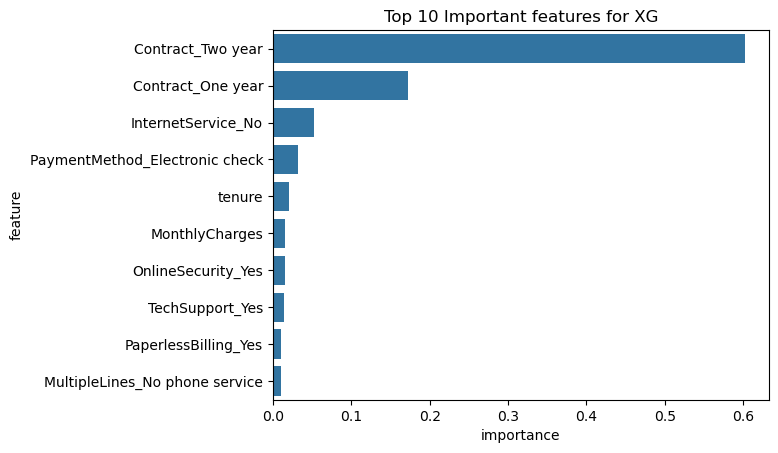

In [27]:
#---feature importance for XG
best_xgb = random_search.best_estimator_
importances  = best_xgb.feature_importances_
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

top_features = feature_importances.head(10)

sns.barplot(x=top_features['importance'], y=top_features['feature'], orient='h')
plt.title('Top 10 Important features for XG')
plt.show()

In [28]:
#cross validation

skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=42)

def cv_recall(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='recall')

    return {
        'Mean scores': np.mean(scores),
        'Folds': scores
    }


In [29]:
results={
    'logistic regression': cv_recall(lr,X,y,skf),
    'Random Forest': cv_recall(r_cv,X,y,skf),
    'XGBoost': cv_recall(random_search, X,y,skf)
}

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, class_weight=balanced, max_depth=10, min_samples_lea

**Insights**

- Using cross-validation with recall as the scoring metric means that in each fold, I evaluated the models on how well it catches churners.

In [30]:
print(results)

{'logistic regression': {'Mean scores': np.float64(0.7939882697947214), 'Folds': array([0.82887701, 0.78609626, 0.85561497, 0.75806452, 0.80213904,
       0.81283422, 0.78609626, 0.75935829, 0.78074866, 0.77005348])}, 'Random Forest': {'Mean scores': np.float64(0.7421079868897706), 'Folds': array([0.79679144, 0.70053476, 0.7540107 , 0.74193548, 0.80748663,
       0.81283422, 0.6684492 , 0.73262032, 0.7486631 , 0.65775401])}, 'XGBoost': {'Mean scores': np.float64(0.8004140072451268), 'Folds': array([0.80213904, 0.82352941, 0.8342246 , 0.77419355, 0.79144385,
       0.80748663, 0.78609626, 0.80748663, 0.81818182, 0.75935829])}}


**Insights**

- The results showed that Logistic Regression (0.796) and XGBoost (0.797) achieved the highest average recall, indicating strong ability to detect churners across multiple data splits. Random Forest (0.742) performed slightly lower, missing more churn cases but still providing stable results.

- Overally, both Logistic Regression and XGBoost generalize well and demonstrate consistent performance on unseen data with with XGBoost offering greater flexibility for handling non-linear relationships and Logistic Regression providing easier interpretability.